In [2]:
import pandas as pd
df = pd.read_csv('testingdataset.csv')
df.head()

,y,ds
0,7,2022-09-01
1,4,2022-09-02
2,1,2022-09-27
3,12,2022-09-28
4,14,2022-09-30


In [7]:
data = df[['type', 'occurredAt']]
data.head()

,type,occurredAt
0,client_vpn_disconnect,2022-09-01T17:27:21.010667Z
1,vpn,2022-09-01T17:22:20.529396Z
2,vpn,2022-09-01T17:10:33.871629Z
3,vpn,2022-09-01T17:10:33.835943Z
4,vpn,2022-09-01T17:10:33.793951Z


In [10]:
data.rename(columns = {'type' : 'y','occurredAt':'ds'},inplace = True)

/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_31257/1024508920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'type' : 'y','occurredAt':'ds'},inplace = True)


In [16]:
data.drop(data.tail(1).index,inplace=True)
data.dropna()

/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_31257/482377533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.tail(1).index,inplace=True)


,y,ds
0,client_vpn_disconnect,2022-09-01T17:27:21.010667Z
1,vpn,2022-09-01T17:22:20.529396Z
2,vpn,2022-09-01T17:10:33.871629Z
3,vpn,2022-09-01T17:10:33.835943Z
4,vpn,2022-09-01T17:10:33.793951Z
...,...,...
20166,vpn,2022-11-17T14:11:06.781701Z
20167,client_vpn_connect,2022-11-17T14:36:41.471146Z
20168,vpn,2022-11-17T14:36:38.589068Z
20169,vpn,2022-11-17T14:36:38.301624Z


# this is for ds

# this is for Y

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(data['y'])
df = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
print(df)

       client_vpn_connect  client_vpn_disconnect  vpn
0                     0.0                    1.0  0.0
1                     0.0                    0.0  1.0
2                     0.0                    0.0  1.0
3                     0.0                    0.0  1.0
4                     0.0                    0.0  1.0
...                   ...                    ...  ...
20166                 0.0                    0.0  1.0
20167                 1.0                    0.0  0.0
20168                 0.0                    0.0  1.0
20169                 0.0                    0.0  1.0
20170                 0.0                    0.0  1.0

[20171 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# create some sample text data
text_data = data['y']
vectorizer = CountVectorizer()
vectorizer.fit(text_data)
bow_model = vectorizer.transform(text_data)
print(bow_model)

  (0, 1)	1
  (1, 2)	1
  (2, 2)	1
  (3, 2)	1
  (4, 2)	1
  (5, 2)	1
  (6, 2)	1
  (7, 2)	1
  (8, 2)	1
  (9, 2)	1
  (10, 2)	1
  (11, 2)	1
  (12, 1)	1
  (13, 2)	1
  (14, 2)	1
  (15, 2)	1
  (16, 2)	1
  (17, 2)	1
  (18, 2)	1
  (19, 0)	1
  (20, 2)	1
  (21, 2)	1
  (22, 0)	1
  (23, 2)	1
  (24, 2)	1
  :	:
  (20146, 2)	1
  (20147, 2)	1
  (20148, 2)	1
  (20149, 2)	1
  (20150, 2)	1
  (20151, 2)	1
  (20152, 1)	1
  (20153, 2)	1
  (20154, 2)	1
  (20155, 2)	1
  (20156, 2)	1
  (20157, 0)	1
  (20158, 2)	1
  (20159, 2)	1
  (20160, 2)	1
  (20161, 2)	1
  (20162, 2)	1
  (20163, 2)	1
  (20164, 2)	1
  (20165, 2)	1
  (20166, 2)	1
  (20167, 0)	1
  (20168, 2)	1
  (20169, 2)	1
  (20170, 2)	1


In [28]:
bow_model.toarray()

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20171 entries, 0 to 20170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       20171 non-null  object
 1   ds      20171 non-null  object
dtypes: object(2)
memory usage: 315.3+ KB


In [20]:
data['ds'] = pd.to_datetime(data['ds'])
data['y'] = data['y'].astype(int)
data.info()

/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/ipykernel_31257/8884759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ds'] = pd.to_datetime(data['ds'])


ValueError: invalid literal for int() with base 10: 'client_vpn_disconnect'

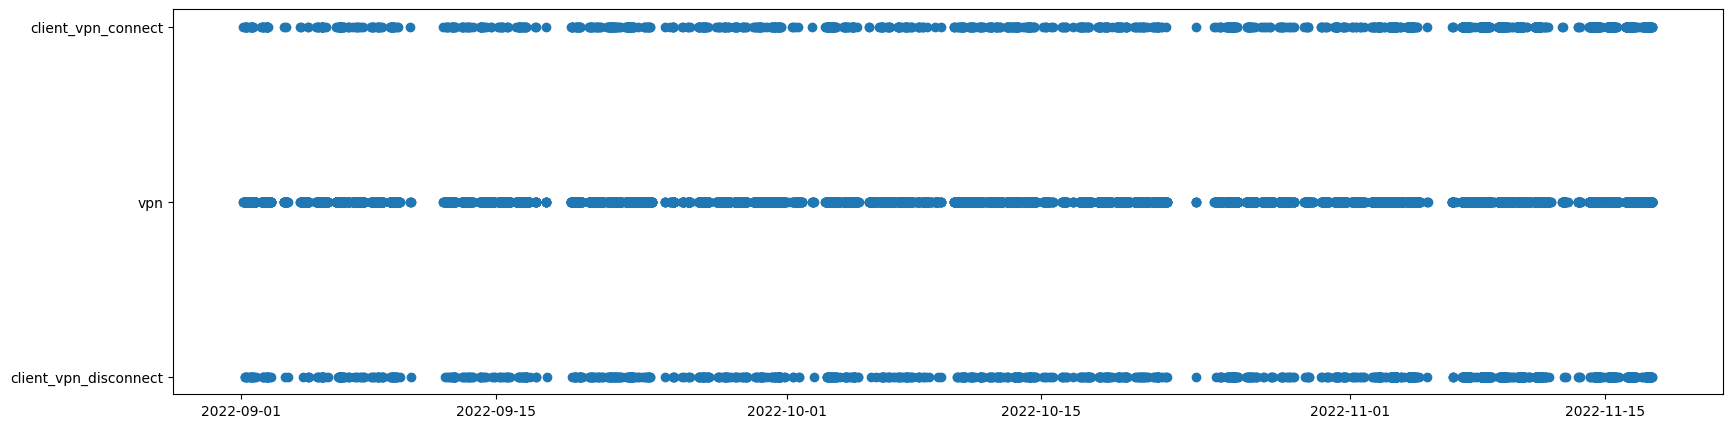

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(data['ds'],data['y'])
plt.show()

In [4]:
# Fb Prophet 
import fbprophet

op = fbprophet.Prophet(changepoint_prior_scale=1)
op.fit(df)

/Users/anthony/opt/anaconda3/envs/intone/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:53:28 - cmdstanpy - INFO - Chain [1] start processing
14:53:29 - cmdstanpy - INFO - Chain [1] done processing
14:53:29 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 6 Unknown error: -6


RuntimeError: Error during optimization! Command '/Users/anthony/opt/anaconda3/envs/intone/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin random seed=24357 data file=/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/tmpaqrxateo/cdxq3jyq.json init=/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/tmpaqrxateo/0yh_xpd_.json output file=/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/tmpaqrxateo/prophet_modelraxu_vwp/prophet_model-20230216145328.csv method=optimize algorithm=newton iter=10000' failed: console log output:

dyld[46087]: Library not loaded: @rpath/libtbb.dylib
  Referenced from: <E81C8689-FC33-38A2-A56E-4C3D7AEE7EC3> /Users/anthony/opt/anaconda3/envs/intone/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin
  Reason: tried: '/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/libtbb.dylib' (no such file), '/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/private/var/folders/p2/05zzb9jx10x6f3chs84fjng80000gn/T/pip-install-1maad6hl/prophet_2c4e5509ac1342ad9a7815ecce4bcb8b/build/lib.macosx-11.0-arm64-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/usr/local/lib/libtbb.dylib' (no such file), '/usr/lib/libtbb.dylib' (no such file, not in dyld cache)


In [ ]:
forecast = op.make_future_dataframe(periods = 365 ,freq = 'D')
forecast = op.predict(forecast)
forecast.columns

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel='Potato Price/q');